In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
from  matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

## EDA

Membaca Data

In [2]:
df = pd.read_csv('Neraca Akses Pangan Berdasarkan Kabupaten_Kota di Jawa Barat - 08 Juli 2025.csv')
df.head()

,bulan,kabupaten/kota,kebutuhan,ketersediaan,kode_kabupaten_atau_kota,kode_komoditas,komoditas,minggu,neraca,Nama Kabupaten Kota,nama_kabupaten_kota,bulan/month,tahun
0,6,BOGOR,59242.0,61717,3201,3010,beras,3,2474.0,BOGOR,BOGOR,NaN,2024
1,6,SUKABUMI,29573.0,106214,3202,3010,beras,3,76641.0,SUKABUMI,SUKABUMI,NaN,2024
2,6,CIANJUR,17449.0,556501,3203,3010,beras,3,539052.0,CIANJUR,CIANJUR,NaN,2024
3,6,BANDUNG,39129.0,16026,3204,3010,beras,3,-23103.0,BANDUNG,BANDUNG,NaN,2024
4,6,GARUT,18202.0,176638,3205,3010,beras,3,158435.0,GARUT,GARUT,NaN,2024


Jumlah Nilai Unik di Setiap Kolom

In [3]:
for column in df.columns:
    print(df[column].nunique())

12
27
2008
4082
27
11
11
5
3752
27
27
0
3


Informasi Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42471 entries, 0 to 42470
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bulan                     42471 non-null  int64  
 1   kabupaten/kota            11286 non-null  object 
 2   kebutuhan                 42471 non-null  float64
 3   ketersediaan              42471 non-null  object 
 4   kode_kabupaten_atau_kota  42471 non-null  int64  
 5   kode_komoditas            42471 non-null  int64  
 6   komoditas                 42471 non-null  object 
 7   minggu                    42471 non-null  int64  
 8   neraca                    42471 non-null  float64
 9   Nama Kabupaten Kota       11286 non-null  object 
 10  nama_kabupaten_kota       42471 non-null  object 
 11  bulan/month               0 non-null      float64
 12  tahun                     42471 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 4.2+ MB


Mengubah Kolom 'Ketersediaan' Menjadi Tipe Data Numerik

In [5]:
df['ketersediaan'] = df['ketersediaan'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['ketersediaan'] = pd.to_numeric(df['ketersediaan'])

Merapihkan Kolom yang Duplikat

In [6]:
df = df.drop(df.columns[[9, 10, 11]], axis=1)
df.head()

,bulan,kabupaten/kota,kebutuhan,ketersediaan,kode_kabupaten_atau_kota,kode_komoditas,komoditas,minggu,neraca,tahun
0,6,BOGOR,59242.0,61717.0,3201,3010,beras,3,2474.0,2024
1,6,SUKABUMI,29573.0,106214.0,3202,3010,beras,3,76641.0,2024
2,6,CIANJUR,17449.0,556501.0,3203,3010,beras,3,539052.0,2024
3,6,BANDUNG,39129.0,16026.0,3204,3010,beras,3,-23103.0,2024
4,6,GARUT,18202.0,176638.0,3205,3010,beras,3,158435.0,2024


Deskripsi Statistik Data

In [7]:
df.describe()

,bulan,kebutuhan,ketersediaan,kode_kabupaten_atau_kota,kode_komoditas,minggu,neraca,tahun
count,42471.000000,42471.000000,42471.000000,42471.000000,42471.000000,42471.000000,4.247100e+04,42471.000000
mean,6.455888,1110.584557,6872.752916,3231.333333,3006.000000,2.639542,5.686494e+03,2023.090909
std,3.228366,4007.738769,41488.527963,31.202219,3.162315,1.214627,5.099770e+04,0.792536
min,1.000000,-2705.000000,-87082.000000,3201.000000,3001.000000,1.000000,-1.127620e+05,2022.000000
25%,4.000000,34.000000,42.000000,3207.000000,3003.000000,2.000000,1.000000e+00,2022.000000
50%,6.000000,142.000000,223.000000,3214.000000,3006.000000,3.000000,3.300000e+01,2023.000000
75%,9.000000,548.000000,1098.000000,3273.000000,3009.000000,4.000000,3.600000e+02,2024.000000
max,12.000000,78349.000000,815379.000000,3279.000000,3011.000000,5.000000,3.164305e+06,2024.000000


Bagaimana Korelasi Antar Kolom?

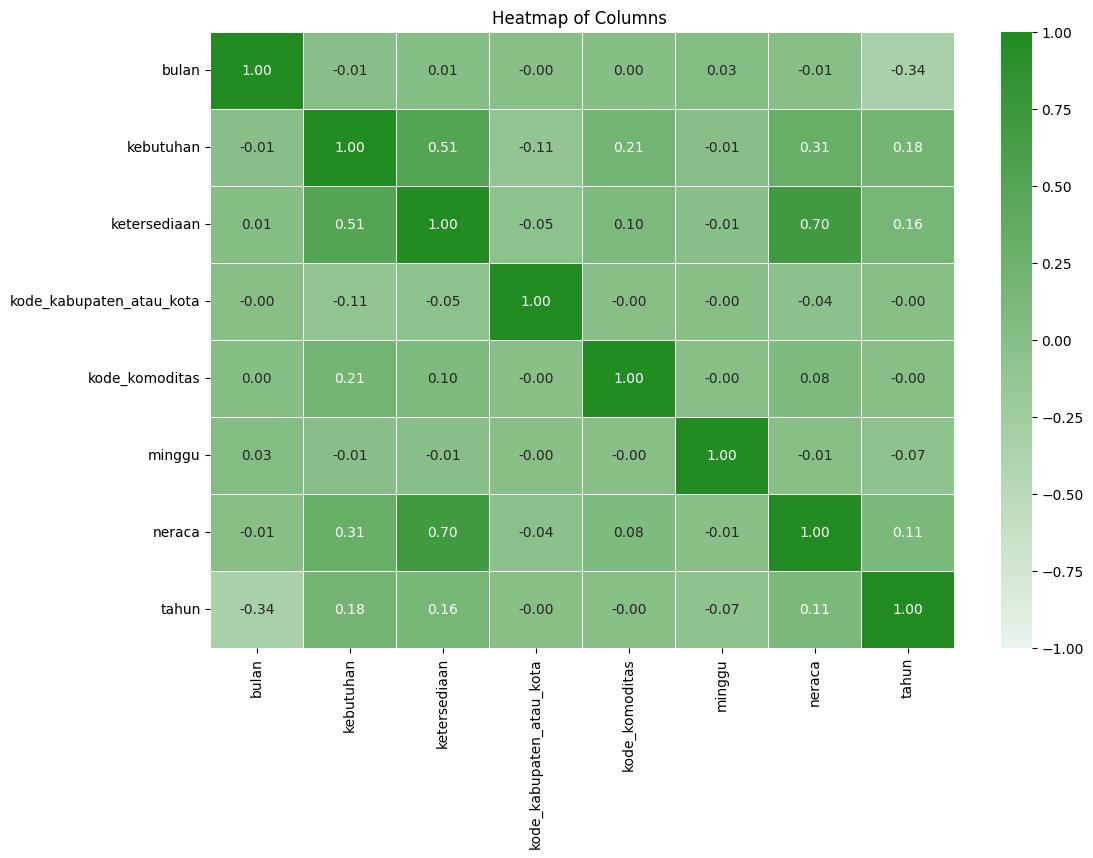

In [8]:
green_palette = sns.light_palette("#228B22", as_cmap=True)

correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=green_palette,
    fmt=".2f",
    linewidths=.5,
    vmin=-1, vmax=1
)

plt.title('Heatmap of Columns ')
plt.show()

Bagaimana Korelasi Antara Ketersediaan Pangan dengan Kebutuhan Pangan di Jawa Barat?

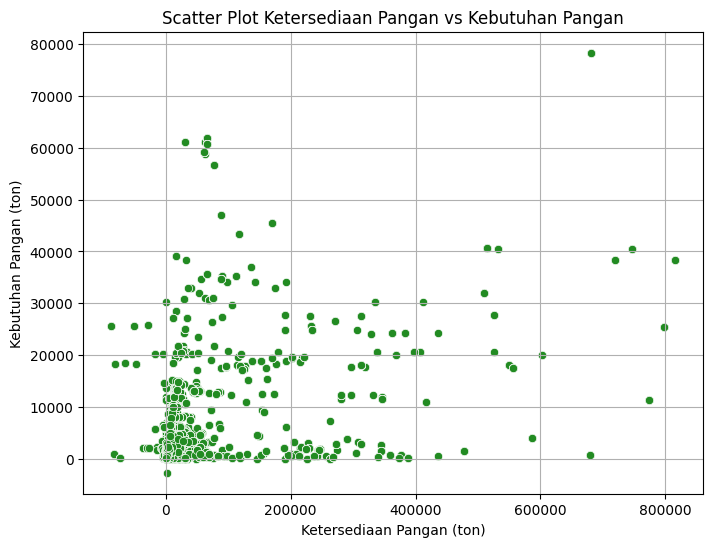

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ketersediaan', y='kebutuhan', data=df, color="#228B22")
plt.title('Scatter Plot Ketersediaan Pangan vs Kebutuhan Pangan')
plt.xlabel('Ketersediaan Pangan (ton)')
plt.ylabel('Kebutuhan Pangan (ton)')
plt.grid(True)
plt.show()

Bagaimana Neraca Pangan di Jawa Barat 34 Bulan Terakhir

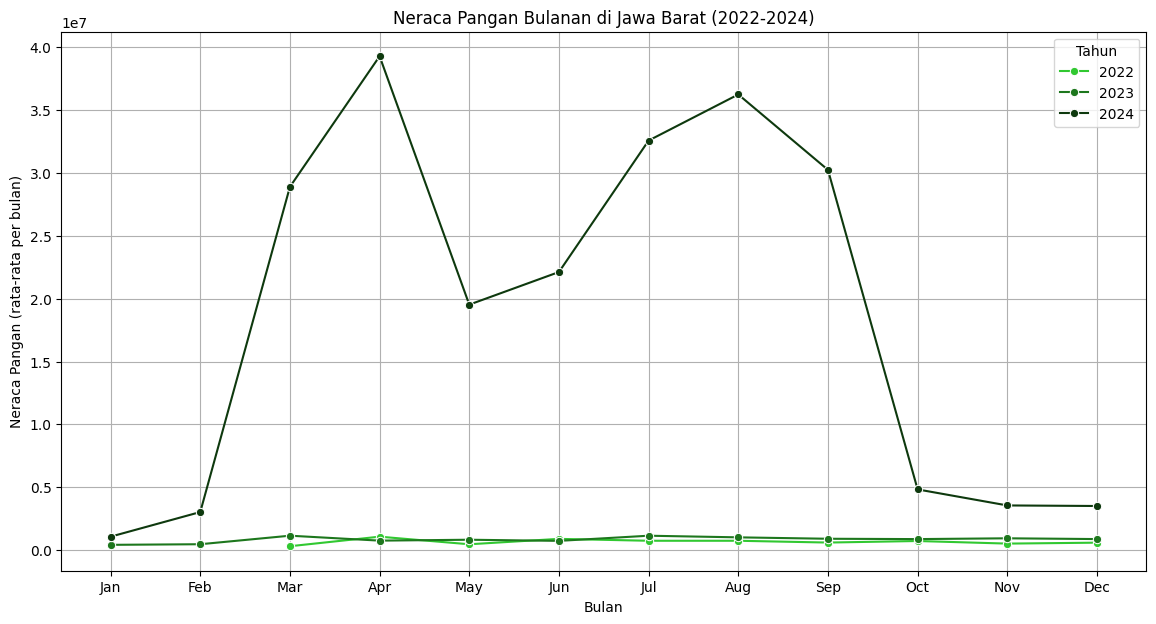

In [10]:
df_34_bulan = df[(df['tahun'] >= 2022) & (df['tahun'] <= 2024)].copy()
monthly_neraca = df_34_bulan.groupby(['tahun', 'bulan'])['neraca'].sum().reset_index()
monthly_neraca = monthly_neraca.sort_values(by=['tahun', 'bulan'])

plt.figure(figsize=(14, 7))
palette = {2022: '#31c831', 2023: '#1d771d', 2024: '#0e390e'}

sns.lineplot(
    data=monthly_neraca,
    x='bulan',
    y='neraca',
    hue='tahun',
    marker='o',
    palette=palette
)

plt.title('Neraca Pangan Bulanan di Jawa Barat (2022-2024)')
plt.xlabel('Bulan')
plt.ylabel('Neraca Pangan (rata-rata per bulan)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Tahun')
plt.show()

Ranking Komoditas dengan Kebutuhan Terbanyak di Jawa Barat

C:\Users\alghi\AppData\Local\Temp\ipykernel_39776\916670036.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=commodity_demand.index, x=commodity_demand.values, palette=base_palette)


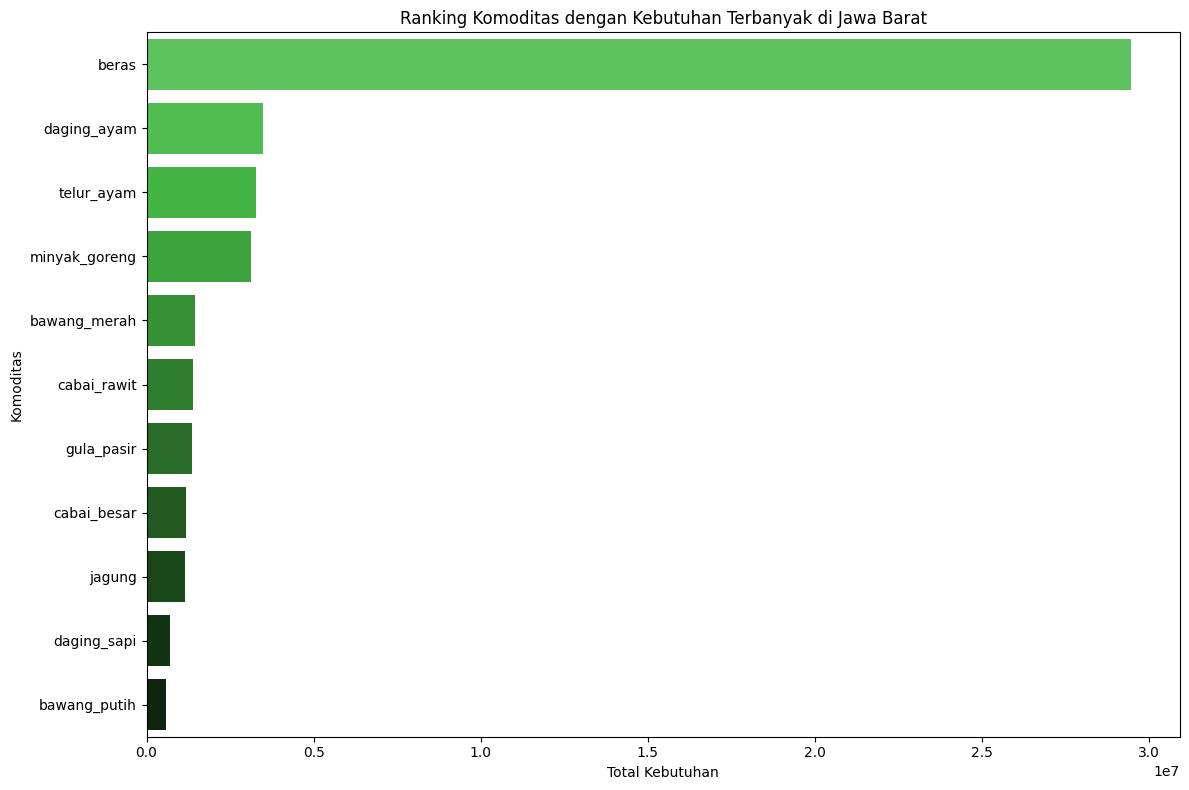

In [11]:
commodity_demand = df.groupby('komoditas')['kebutuhan'].sum().sort_values(ascending=False)

base_palette = ['#4dd34d', '#3dcf3d', '#31c831', '#2cb42c', '#279f27', '#228b22', '#1d771d', '#186218', '#134e13', '#0e390e', '#0a290a']

plt.figure(figsize=(12, 8))
sns.barplot(y=commodity_demand.index, x=commodity_demand.values, palette=base_palette)
plt.title('Ranking Komoditas dengan Kebutuhan Terbanyak di Jawa Barat')
plt.xlabel('Total Kebutuhan')
plt.ylabel('Komoditas')
plt.tight_layout()
plt.show()

Kabupaten/Kota dengan Ketersediaan Beras Tertinggi

C:\Users\alghi\AppData\Local\Temp\ipykernel_39776\3386763959.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=kab_kota_rice_availability.index, x=kab_kota_rice_availability.values, palette=base_palette)
C:\Users\alghi\AppData\Local\Temp\ipykernel_39776\3386763959.py:5: UserWarning: 
The palette list has fewer values (11) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=kab_kota_rice_availability.index, x=kab_kota_rice_availability.values, palette=base_palette)


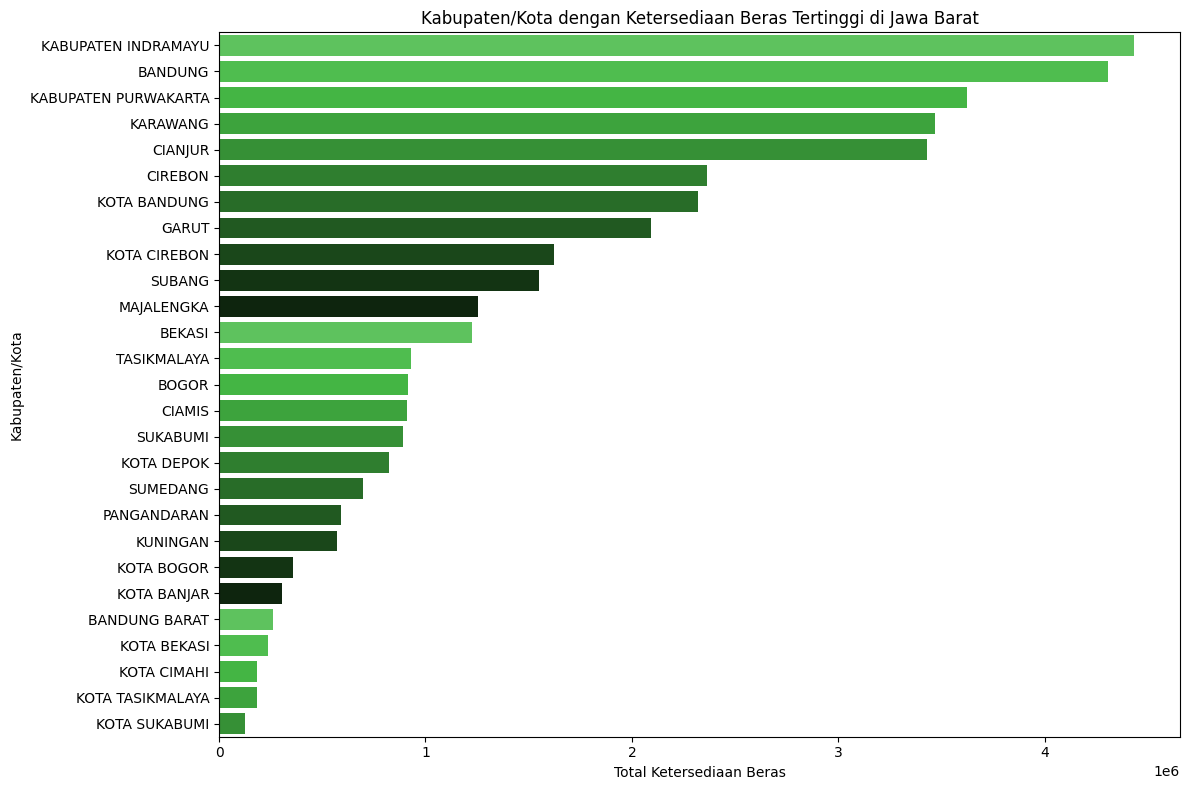

In [12]:
rice_data = df[df['komoditas'] == 'beras']
kab_kota_rice_availability = rice_data.groupby('kabupaten/kota')['ketersediaan'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y=kab_kota_rice_availability.index, x=kab_kota_rice_availability.values, palette=base_palette)
plt.title('Kabupaten/Kota dengan Ketersediaan Beras Tertinggi di Jawa Barat')
plt.xlabel('Total Ketersediaan Beras')
plt.ylabel('Kabupaten/Kota')
plt.tight_layout()
plt.show()

## Data Preprocessing

Drop Kolom dengan Informasi yang Kurang Penting

In [13]:
df = df.drop(['kabupaten/kota',	'komoditas'], axis = 1)
df.head()

,bulan,kebutuhan,ketersediaan,kode_kabupaten_atau_kota,kode_komoditas,minggu,neraca,tahun
0,6,59242.0,61717.0,3201,3010,3,2474.0,2024
1,6,29573.0,106214.0,3202,3010,3,76641.0,2024
2,6,17449.0,556501.0,3203,3010,3,539052.0,2024
3,6,39129.0,16026.0,3204,3010,3,-23103.0,2024
4,6,18202.0,176638.0,3205,3010,3,158435.0,2024


Ubah Satuan Nilai pada Bulan dan Minggu yang Berbeda

In [14]:
df['bulan'] = df.apply(lambda row:
                       row['bulan'] + 12 if row['tahun'] == 2023
                       else (row['bulan'] + 24 if row['tahun'] == 2024
                             else row['bulan']),
                       axis=1)

df['minggu'] = df.apply(lambda row:
                        row['minggu'] + 52 if row['tahun'] == 2023
                        else (row['minggu'] + 104 if row['tahun'] == 2024
                              else row['minggu']),
                        axis=1)
df.head()

,bulan,kebutuhan,ketersediaan,kode_kabupaten_atau_kota,kode_komoditas,minggu,neraca,tahun
0,30.0,59242.0,61717.0,3201,3010,107.0,2474.0,2024
1,30.0,29573.0,106214.0,3202,3010,107.0,76641.0,2024
2,30.0,17449.0,556501.0,3203,3010,107.0,539052.0,2024
3,30.0,39129.0,16026.0,3204,3010,107.0,-23103.0,2024
4,30.0,18202.0,176638.0,3205,3010,107.0,158435.0,2024


Split Data

In [15]:
X = df.drop(['neraca'], axis=1)
y = df['neraca']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (33976, 7)
Shape of X_test: (8495, 7)
Shape of y_train: (33976,)
Shape of y_test: (8495,)


Normalization

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("X_train after scaling:")
print(X_train.head())
print("\nX_test after scaling:")
print(X_test.head())

X_train after scaling:
      bulan  kebutuhan  ketersediaan  kode_kabupaten_atau_kota  \
0 -0.061263   0.645271      0.447624                 -0.779868   
1  0.162384  -0.274416     -0.165039                 -0.587538   
2  1.504269  -0.264074     -0.164018                  1.528087   
3  1.727916  -0.221949      2.739353                  1.431922   
4 -0.620382   0.350648     -0.030383                 -0.747813   

   kode_komoditas    minggu     tahun  
0        1.265958 -0.057100 -0.114361  
1        1.582324 -0.130048 -0.114361  
2       -1.581337  1.158709  1.147992  
3        0.316860  1.110077  1.147992  
4        1.265958 -0.130048 -0.114361  

X_test after scaling:
      bulan  kebutuhan  ketersediaan  kode_kabupaten_atau_kota  \
0 -0.284911   0.184166     -0.097954                  1.271647   
1 -0.955853   0.082007     -0.129126                  1.431922   
2 -0.955853  -0.251714     -0.162899                 -0.908088   
3 -1.403148  -0.177301     -0.154219                 

Outlier

In [17]:
outliers = np.where(np.abs(X_train) > 3)[0]
print(f"Jumlah outlier: {len(outliers)}")

Jumlah outlier: 1084


## Evaluasi

Inisialisasi Model Lain

In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

Load Best Model 

In [19]:
with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

In [20]:
# Dictionary untuk menyimpan hasil
results = {}

# Perbandingan beberapa model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    print(f"{model_name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}\n")

# Evaluasi model terbaik (Random Forest)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Hasil pada dictionary
results['Random Forest Regressor'] = {
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
}
print(f"Random Forest Regressor - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}\n")

Training Linear Regression...
Linear Regression - MSE: 142087243.3292, RMSE: 11920.0354, R2: 0.9075

Training Decision Tree Regressor...
Decision Tree Regressor - MSE: 5405004.4253, RMSE: 2324.8665, R2: 0.9965

Training Support Vector Regressor...
Support Vector Regressor - MSE: 1562220736.6202, RMSE: 39524.9382, R2: -0.0170

Training K-Nearest Neighbors Regressor...
K-Nearest Neighbors Regressor - MSE: 14104600.6650, RMSE: 3755.6092, R2: 0.9908

Random Forest Regressor - MSE: 2305719.4325, RMSE: 1518.4596, R2: 0.9985



Ringkasan Perbandingan Model

In [21]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                                        MSE          RMSE        R2
Linear Regression              1.420872e+08  11920.035374  0.907506
Decision Tree Regressor        5.405004e+06   2324.866539  0.996482
Support Vector Regressor       1.562221e+09  39524.938161 -0.016957
K-Nearest Neighbors Regressor  1.410460e+07   3755.609227  0.990818
Random Forest Regressor        2.305719e+06   1518.459559  0.998499


Perbandingan Model Menurut RMSE

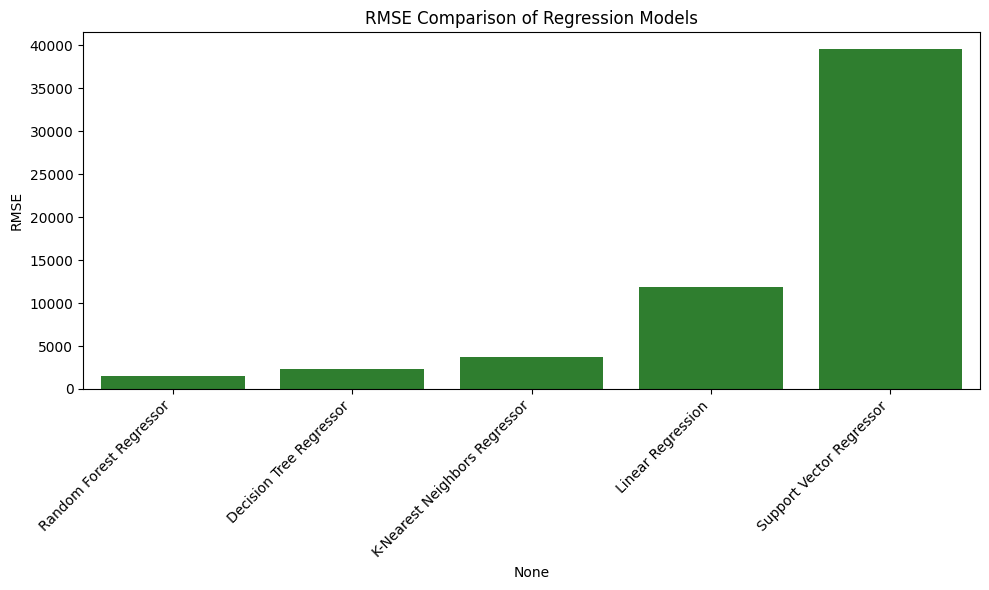

In [22]:
results_df_sorted_rmse = results_df.sort_values(by='RMSE')

plt.figure(figsize=(10, 6))
sns.barplot(
    x=results_df_sorted_rmse.index,
    y=results_df_sorted_rmse['RMSE'],
    color='#228B22'
)
plt.title('RMSE Comparison of Regression Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Perbandingan Model Menurut R-Square

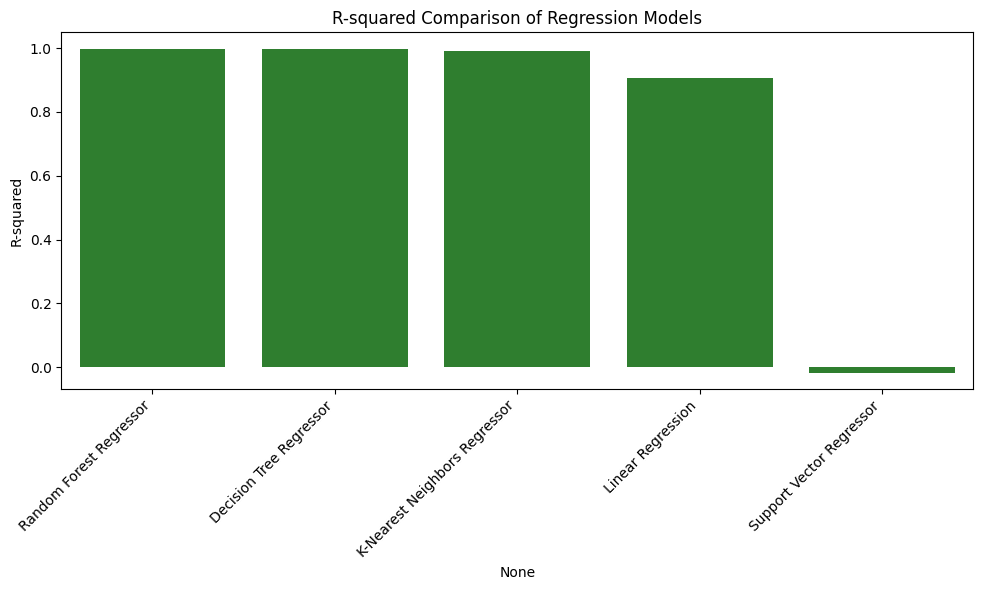

In [23]:
results_df_sorted_r2 = results_df.sort_values(by='R2', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df_sorted_r2.index, y=results_df_sorted_r2['R2'], color='#228B22' )
plt.title('R-squared Comparison of Regression Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Fitur Terpenting terhadap Target

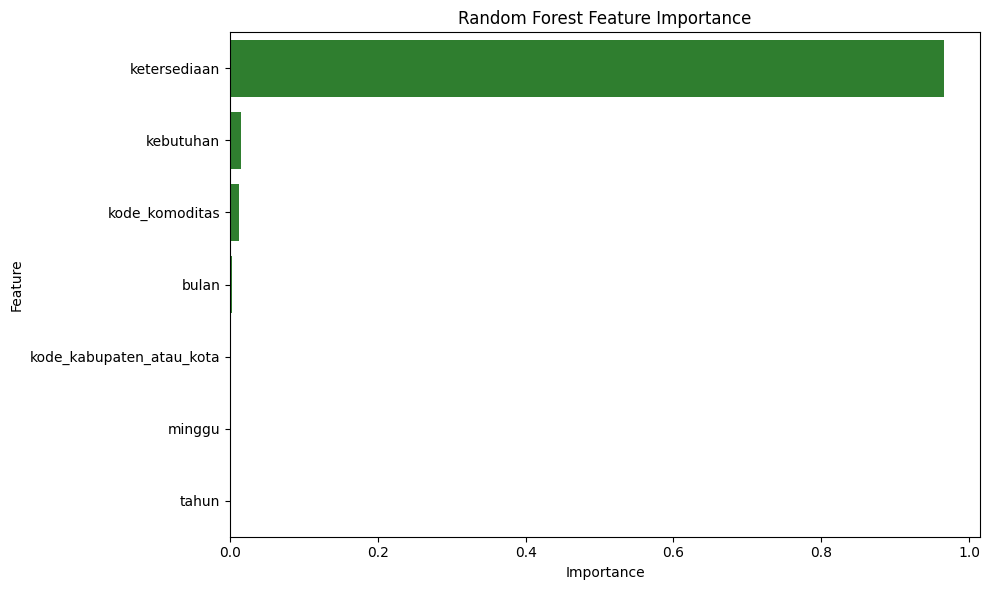

In [24]:
rf_model = best_model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, color='#228B22')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()